# 데이터 분석
> 1. 각 컬럼별 관중 수 관계 파악하기
> 2. 컬럼별 관중 수 평균으로 군집화
> 3. 상관계수 확인하기

In [1]:
# 계산
import pandas as pd
import numpy as np

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [4]:
# 데이터 열기
kiwoom_new = pd.read_csv('./Data/kiwoom_new.csv')
kiwoom_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척


In [5]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          171 non-null    object 
 1   팀명          171 non-null    object 
 2   순위          171 non-null    int64  
 3   총 경기수       171 non-null    int64  
 4   승리          171 non-null    int64  
 5   패배          171 non-null    int64  
 6   무승부         171 non-null    int64  
 7   승률          171 non-null    float64
 8   게임차         171 non-null    float64
 9   최근 10경기 전적  171 non-null    object 
 10  연속 승패 현황    171 non-null    object 
 11  홈 경기 전적     171 non-null    object 
 12  원정 경기 전적    171 non-null    object 
 13  요일          171 non-null    object 
 14  홈팀          171 non-null    object 
 15  원정팀         171 non-null    object 
 16  장소          171 non-null    object 
 17  관중 수        171 non-null    int64  
 18  시작시간        171 non-null    object 
 19  종료시간        171 non-null    o

----
## 필요 데이터 선별
----

In [6]:
# 날짜 데이터 타입 변환
kiwoom_new['날짜'] = kiwoom_new['날짜'].astype('datetime64[ns]')
kiwoom_new

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,키움,7,45,19,26,0,0.422,10.0,4승0무6패,...,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,키움,8,46,19,27,0,0.413,10.0,4승0무6패,...,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,키움,8,47,19,28,0,0.404,10.0,4승0무6패,...,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,키움,8,48,20,28,0,0.417,9.0,5승0무5패,...,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [7]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          171 non-null    datetime64[ns]
 1   팀명          171 non-null    object        
 2   순위          171 non-null    int64         
 3   총 경기수       171 non-null    int64         
 4   승리          171 non-null    int64         
 5   패배          171 non-null    int64         
 6   무승부         171 non-null    int64         
 7   승률          171 non-null    float64       
 8   게임차         171 non-null    float64       
 9   최근 10경기 전적  171 non-null    object        
 10  연속 승패 현황    171 non-null    object        
 11  홈 경기 전적     171 non-null    object        
 12  원정 경기 전적    171 non-null    object        
 13  요일          171 non-null    object        
 14  홈팀          171 non-null    object        
 15  원정팀         171 non-null    object        
 16  장소          171 non-null  

In [8]:
# 해당 열들은 목표로 하는 분석 내용과 상관이 없는 데이터 -> 삭제
kiwoom_new = kiwoom_new.drop(['팀명','홈팀','장소','구장','홈팀 선발','어웨이팀 선발'],axis=1)
kiwoom_new

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,7,45,19,26,0,0.422,10.0,4승0무6패,1승,10-0-14,9-0-12,일,SSG,10049,14:01,17:13,3:12
167,2024-05-21,8,46,19,27,0,0.413,10.0,4승0무6패,1패,10-0-15,9-0-12,화,NC,3940,18:31,21:53,3:22
168,2024-05-22,8,47,19,28,0,0.404,10.0,4승0무6패,2패,10-0-16,9-0-12,수,NC,4337,18:31,21:54,3:23
169,2024-05-23,8,48,20,28,0,0.417,9.0,5승0무5패,1승,11-0-16,9-0-12,목,NC,3897,18:30,21:14,2:44


----
## 2022~2023년 데이터와 2024년 데이터 분리
----

In [9]:
# 2022 ~ 2023년도 데이터
kiwoom_2022_2023 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2022) | 
        (kiwoom_new.날짜.dt.year == 2023)
        ]
kiwoom_2022_2023

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-21,10,134,53,78,3,0.405,27.0,2승0무8패,2승,30-2-35,23-1-43,목,NC,5178,18:30,21:18,2:48
139,2023-09-28,10,136,55,78,3,0.414,27.0,4승0무6패,4승,31-2-35,24-1-43,목,SSG,7082,17:00,19:59,2:59
140,2023-09-29,10,137,55,79,3,0.410,27.0,4승0무6패,1패,31-2-36,24-1-43,금,KIA,14472,14:00,17:57,3:57
141,2023-10-07,10,141,57,81,3,0.413,27.5,6승0무4패,2승,32-2-36,25-1-45,토,LG,13301,17:00,19:49,2:49


In [10]:
# 2024년도 데이터
kiwoom_2024 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2024)
        ].reset_index(drop=True)
kiwoom_2024

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2024-03-29,10,4,0,4,0,0.000,4.0,0승0무4패,4패,0-0-1,0-0-3,금,LG,8465,18:30,21:13,2:43
1,2024-03-30,8,5,1,4,0,0.200,4.0,1승0무4패,1승,1-0-1,0-0-3,토,LG,13462,17:01,19:45,2:44
2,2024-03-31,7,6,2,4,0,0.333,4.0,2승0무4패,2승,2-0-1,0-0-3,일,LG,11822,14:00,16:49,2:49
3,2024-04-05,5,9,5,4,0,0.556,2.5,5승0무4패,5승,3-0-1,2-0-3,금,한화,16000,18:30,21:31,3:01
4,2024-04-06,5,10,6,4,0,0.600,1.5,6승0무4패,6승,4-0-1,2-0-3,토,한화,16000,17:01,19:56,2:55
5,2024-04-07,3,11,7,4,0,0.636,1.0,7승0무3패,7승,5-0-1,2-0-3,일,한화,16000,14:00,17:25,3:25
6,2024-04-12,3,15,9,6,0,0.600,2.5,8승0무2패,2승,6-0-1,3-0-5,금,롯데,8838,18:30,21:31,3:01
7,2024-04-13,3,16,10,6,0,0.625,2.5,8승0무2패,3승,7-0-1,3-0-5,토,롯데,14197,17:00,19:52,2:52
8,2024-04-14,3,17,11,6,0,0.647,2.5,8승0무2패,4승,8-0-1,3-0-5,일,롯데,12333,14:00,17:45,3:45
9,2024-04-16,2,18,12,6,0,0.667,1.5,8승0무2패,5승,9-0-1,3-0-5,화,KT,2877,18:31,21:04,2:33


----
## 컬럼별 타겟 분석 시작
----

In [11]:
# # 데이터 검정 함수(ANOVA 검정)
# def ANOVATestData(func):

#     # 요일 순서 설정
#     orders = func.iloc[:,0].unique()

#     # 요일 순서에 맞게 정렬
#     func.iloc[:,0] = pd.Categorical(func.iloc[:,0], categories=orders, ordered=True)

#     # 요일별로 관중 수 그룹화
#     groups = [func.iloc[:,1][func.iloc[:,0] == order].values for order in orders]

#     # ANOVA 수행
#     f_stat, p_value = f_oneway(*groups)

#     if p_value < 0.05:
#         print(f"{func.columns[0]}별 {func.columns[1]} 차이가 유의미합니다.")
#     else:
#         print(f"{func.columns[0]}별 {func.columns[1]} 차이가 유의미하지 않습니다.")

#     return print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

In [12]:
# 컬럼별 관중 수 시각화
def columnBoxplot(func):
    # 관중 수 분포 확인
    fontKorea()

    # 상자 그림 그리기
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=func.iloc[:,0], y=func.iloc[:,1], data=func)
    plt.title(f'{func.columns[0]}별 {func.columns[1]} 분포')
    plt.show()

In [13]:
# 컬럼별 관중 수 평균 막대그래프 시각화
def meanBarPlot(func):
    # 데이터 불러오기
    data = func.groupby(func.columns[0])[func.columns[1]].mean().sort_values().round(0).astype(int)

    # 막대 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(data.index, data.values, color='skyblue')
    plt.xlabel(func.columns[0])
    plt.ylabel("평균 관중 수")
    plt.ylim(3000,10000)
    plt.title(f"KBO 리그 {func.columns[0]}별 평균 관중 수(2022~2023년)")

    # 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
    plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)
    

    # 그래프 표시
    plt.show()

In [14]:
# # 변환
# mapping = {data.index[i]: data[i+1] for i in range(len(data))}
# mapping
# # 변환 적용
# kiwoom_2022_2023[func.columns[0]].replace(mapping, inplace=True)
# kiwoom_2024[func.columns[0]].replace(mapping, inplace=True)

----
### 순위별
----

In [15]:
# 순위 데이터만 가져오기
rank_crowd = kiwoom_2022_2023[['순위','관중 수']]
rank_crowd

,순위,관중 수
0,6,8257
1,4,6115
2,6,2298
3,7,2304
4,7,2055
...,...,...
138,10,5178
139,10,7082
140,10,14472
141,10,13301


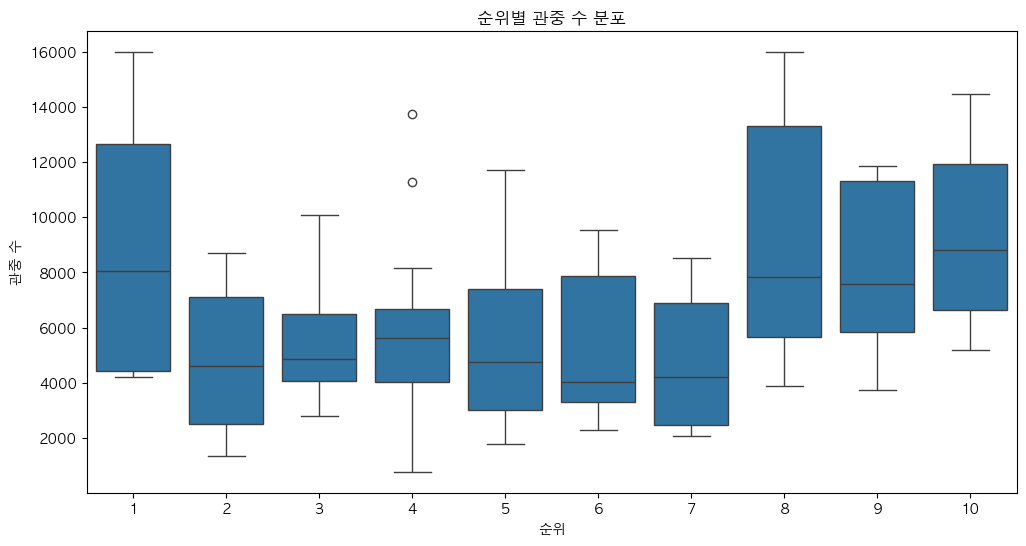

In [16]:
# 순위별 관중 수 분포 boxplot으로 시각화
columnBoxplot(rank_crowd)

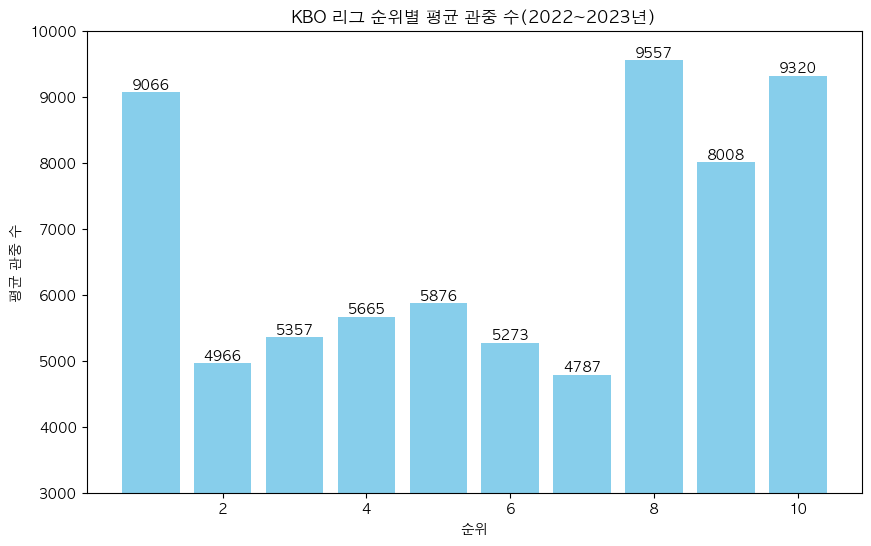

In [17]:
# 순위별 평균 관중 수 boxplot으로 시각화
# 데이터 불러오기
data = rank_crowd.groupby(rank_crowd.columns[0])[rank_crowd.columns[1]].mean().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')
plt.xlabel(rank_crowd.columns[0])
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title(f"KBO 리그 {rank_crowd.columns[0]}별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)


# 그래프 표시
plt.show()

In [18]:
# 변환
rank_mapping = {
    data.index[0] : data[1],
    data.index[1] : data[2],
    data.index[2] : data[3],
    data.index[3] : data[4],
    data.index[4] : data[5],
    data.index[5] : data[6],
    data.index[6] : data[7],
    data.index[7] : data[8],
    data.index[8] : data[9],
    data.index[9] : data[10]
}
# 변환 적용
kiwoom_2022_2023['순위'].replace(rank_mapping, inplace=True)
kiwoom_2024['순위'].replace(rank_mapping, inplace=True)

----
### 요일별
----

In [19]:
# 요일 데이터만 가져오기
date_crowd = kiwoom_2022_2023[['요일','관중 수']]
date_crowd

,요일,관중 수
0,토,8257
1,일,6115
2,화,2298
3,수,2304
4,목,2055
...,...,...
138,목,5178
139,목,7082
140,금,14472
141,토,13301


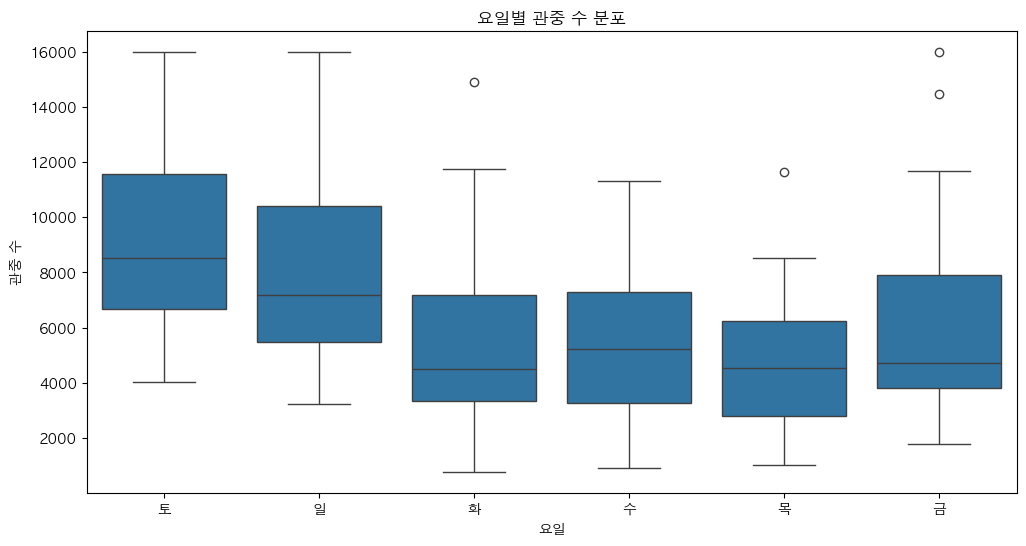

In [20]:
# 순위별 관중 수 분포 boxplot으로 시각화
columnBoxplot(date_crowd)

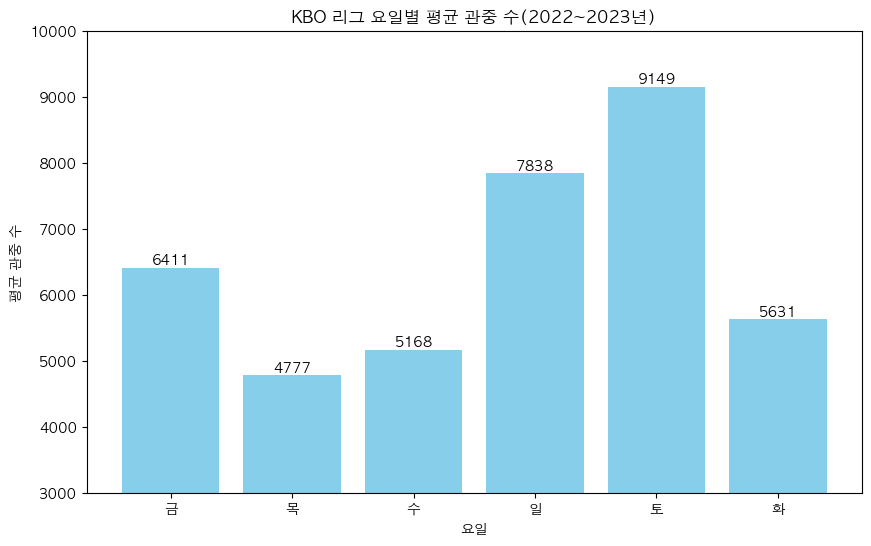

In [21]:
# 순위별 평균 관중 수 boxplot으로 시각화
# 데이터 불러오기
data = date_crowd.groupby(date_crowd.columns[0])[date_crowd.columns[1]].mean().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')
plt.xlabel(date_crowd.columns[0])
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title(f"KBO 리그 {date_crowd.columns[0]}별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)


# 그래프 표시
plt.show()

In [22]:
data[0]

6411

In [23]:
# 변환
day_mapping = {
    data.index[0] : data[0],
    data.index[1] : data[1],
    data.index[2] : data[2],
    data.index[3] : data[3],
    data.index[4] : data[4],
    data.index[5] : data[5]
}
# 변환 적용
kiwoom_2022_2023['요일'].replace(day_mapping, inplace=True)
kiwoom_2024['요일'].replace(day_mapping, inplace=True)

In [24]:
kiwoom_2022_2023[['관중 수','순위','요일']]

,관중 수,순위,요일
0,8257,5273,9149
1,6115,5665,7838
2,2298,5273,5631
3,2304,4787,5168
4,2055,4787,4777
...,...,...,...
138,5178,9320,4777
139,7082,9320,4777
140,14472,9320,6411
141,13301,9320,9149


In [25]:
kiwoom_2022_2023[['관중 수','순위','요일']].corr()

,관중 수,순위,요일
관중 수,1.000000,0.517004,0.450994
순위,0.517004,1.000000,0.106180
요일,0.450994,0.106180,1.000000


In [ ]:
kiwoom_rank_crowd = kiwoom_new[['순위','관중 수']]
kiwoom_rank_crowd

In [ ]:
# 요일 순서 설정 (월, 화, 수, 목, 금, 토, 일)
rank_order = kiwoom_rank_crowd['순위'].unique()

# 요일 순서에 맞게 정렬
kiwoom_rank_crowd['요일'] = pd.Categorical(kiwoom_rank_crowd['순위'], categories=rank_order, ordered=True)

In [ ]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='순위', y='관중 수', data=kiwoom_rank_crowd)
plt.title('순위별 관중 수 분포')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# 요일별로 관중 수 그룹화
groups = [kiwoom_rank_crowd['관중 수'][kiwoom_rank_crowd['순위'] == rank].values for rank in rank_order]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

In [ ]:
if p_value < 0.05:
    print("순위별 관중 수 차이가 유의미합니다.")
else:
    print("순위별 관중 수 차이가 유의미하지 않습니다.")

In [ ]:
# 필요한 열만 선택
kiwoom_date_crowd = kiwoom_new[['요일', '관중 수']]
kiwoom_date_crowd

In [ ]:
kiwoom_date_crowd['요일'].unique()

In [ ]:
# 요일 순서 설정 (월, 화, 수, 목, 금, 토, 일)
day_order = kiwoom_date_crowd['요일'].unique()

# 요일 순서에 맞게 정렬
kiwoom_date_crowd['요일'] = pd.Categorical(kiwoom_date_crowd['요일'], categories=day_order, ordered=True)

In [ ]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='요일', y='관중 수', data=kiwoom_date_crowd)
plt.title('요일별 관중 수 분포')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# 요일별로 관중 수 그룹화
groups = [kiwoom_date_crowd['관중 수'][kiwoom_date_crowd['요일'] == day].values for day in day_order]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

In [ ]:
if p_value < 0.05:
    print("요일별 관중 수 차이가 유의미합니다.")
else:
    print("요일별 관중 수 차이가 유의미하지 않습니다.")

In [ ]:
# 필요한 열만 선택
kiwoom_start_time_crowd = kiwoom_new[['시작시간', '관중 수']]
kiwoom_start_time_crowd

In [ ]:
kiwoom_start_time_crowd.시작시간.unique()

In [ ]:
kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '18:29') |
        (kiwoom_start_time_crowd['시작시간'] == '18:33') |
        (kiwoom_start_time_crowd['시작시간'] == '18:31') 
        ]

In [ ]:
target_rows_18_30 = \
    kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '18:29') |
        (kiwoom_start_time_crowd['시작시간'] == '18:33') |
        (kiwoom_start_time_crowd['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_start_time_crowd.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [ ]:
target_rows_14_00 = \
    kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '13:59') |
        (kiwoom_start_time_crowd['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_start_time_crowd.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [ ]:
target_rows_17_00 = \
    kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '17:01') |
        (kiwoom_start_time_crowd['시작시간'] == '18:00') |
        (kiwoom_start_time_crowd['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_start_time_crowd.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [ ]:
kiwoom_start_time_crowd.시작시간.unique()

In [ ]:
# 시작시간 순서 설정
start_order = kiwoom_start_time_crowd['시작시간'].unique()

# 요일 순서에 맞게 정렬
kiwoom_start_time_crowd['시작시간'] = pd.Categorical(kiwoom_start_time_crowd['시작시간'], categories=start_order, ordered=True)

In [ ]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='시작시간', y='관중 수', data=kiwoom_start_time_crowd)
plt.title('시작시간별 관중 수 분포')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# 시작시간으로 관중 수 그룹화
groups = [kiwoom_start_time_crowd['관중 수'][kiwoom_start_time_crowd['시작시간'] == start].values for start in start_order]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

In [ ]:
if p_value < 0.05:
    print("시작시간별 관중 수 차이가 유의미합니다.")
else:
    print("시작시간별 관중 수 차이가 유의미하지 않습니다.")

In [ ]:
# 필요한 열만 선택
kiwoom_away_crowd = kiwoom_new[['원정팀', '관중 수']]
kiwoom_away_crowd

In [ ]:
kiwoom_away_crowd.원정팀.unique()

In [ ]:
# 시작시간 순서 설정
away_order = \
    kiwoom_away_crowd['원정팀'].unique()

# 요일 순서에 맞게 정렬
kiwoom_away_crowd['원정팀'] = \
    pd.Categorical(
        kiwoom_away_crowd['원정팀'],
        categories=away_order, ordered=True
        )

In [ ]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='원정팀', y='관중 수',
    data=kiwoom_away_crowd
    )
plt.title('원정팀별 관중 수 분포')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# 요일별로 관중 수 그룹화
groups = \
    [
        kiwoom_away_crowd['관중 수'][kiwoom_away_crowd['원정팀'] == away].values for away in away_order
    ]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

In [ ]:
if p_value < 0.05:
    print("원정팀별 관중 수 차이가 유의미합니다.")
else:
    print("원정팀별 관중 수 차이가 유의미하지 않습니다.")

In [ ]:
kiwoom_new

In [ ]:
kiwoom_final = kiwoom_new[['관중 수','요일','원정팀','시작시간','날짜','순위','연속 승패 현황']]
kiwoom_final

In [ ]:
target_rows_18_30 = \
    kiwoom_final[
        (kiwoom_final['시작시간'] == '18:29') |
        (kiwoom_final['시작시간'] == '18:33') |
        (kiwoom_final['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_final.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [ ]:
target_rows_14_00 = \
    kiwoom_final[
        (kiwoom_final['시작시간'] == '13:59') |
        (kiwoom_final['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_final.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [ ]:
target_rows_17_00 = \
    kiwoom_final[
        (kiwoom_final['시작시간'] == '17:01') |
        (kiwoom_final['시작시간'] == '18:00') |
        (kiwoom_final['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_final.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [ ]:
kiwoom_final

In [ ]:
kiwoom_final_2022_2023 = \
    kiwoom_final[
        (kiwoom_final.날짜.dt.year == 2022) | 
        (kiwoom_final.날짜.dt.year == 2023)
        ]
kiwoom_final_2022_2023

In [ ]:
kiwoom_final_2024 = \
    kiwoom_final[
        (kiwoom_final.날짜.dt.year == 2024)
        ]
kiwoom_final_2024

In [ ]:
kiwoom_final_2024 = kiwoom_final_2024.reset_index(drop=True)
kiwoom_final_2024

In [ ]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_final_2022_2023.groupby('요일')['관중 수'].mean().sort_values().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("요일")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 요일별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)

# 그래프 표시
plt.show()

In [ ]:
# 변환
day_mapping = {
    '목': data[0],
    '수': data[1],
    '화': data[2],
    '금': data[3],
    '일': data[4],
    '토': data[5]
}
# 변환 적용
kiwoom_final_2022_2023['요일'].replace(day_mapping, inplace=True)
kiwoom_final_2024['요일'].replace(day_mapping, inplace=True)

In [ ]:
kiwoom_final_2022_2023[['관중 수','요일']].corr()

In [ ]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_final_2022_2023.groupby('시작시간')['관중 수'].mean().sort_values().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("시작시간팀")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 시작시간별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)

# 그래프 표시
plt.show()

In [ ]:
# 변환
day_mapping = {
    '18:30': data[0],
    '17:00': data[1],
    '14:00': data[2]
}
# 변환 적용
kiwoom_final_2022_2023['시작시간'].replace(day_mapping, inplace=True)
kiwoom_final_2024['시작시간'].replace(day_mapping, inplace=True)

In [ ]:
kiwoom_final_2022_2023[['관중 수','요일','시작시간']].corr()

In [ ]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_final_2022_2023.groupby('원정팀')['관중 수'].mean().sort_values().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("원정팀")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 시작시간별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)

# 그래프 표시
plt.show()

In [ ]:
# 변환
day_mapping = {
    'KT': data[0],
    'NC': data[1],
    '두산': data[2],
    '삼성': data[3],
    'LG': data[4],
    'SSG': data[5],
    '한화': data[6],
    'KIA': data[7],
    '롯데': data[8]
}
# 변환 적용
kiwoom_final_2022_2023['원정팀'].replace(day_mapping, inplace=True)
kiwoom_final_2024['원정팀'].replace(day_mapping, inplace=True)

In [ ]:
kiwoom_final_2022_2023[['관중 수','요일','시작시간','원정팀']].corr()

In [ ]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_final_2022_2023.groupby('순위')['관중 수'].mean().sort_values().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("순위")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 순위별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)

# 그래프 표시
plt.show()

In [ ]:
data

In [ ]:
# 변환
day_mapping = {
    7: data[1],
    2: data[2],
    6: data[3],
    3: data[4],
    4: data[5],
    5: data[6],
    9: data[7],
    1: data[8],
    10: data[9],
    8: data[10]
}
# 변환 적용
kiwoom_final_2022_2023['순위'].replace(day_mapping, inplace=True)
kiwoom_final_2024['순위'].replace(day_mapping, inplace=True)

In [ ]:
kiwoom_final_2022_2023

In [ ]:
kiwoom_final_2022_2023['연속 승패 현황'].unique()

In [ ]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_final_2022_2023.groupby('연속 승패 현황')['관중 수'].mean().sort_values().round(0).astype(int)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("연속 승패 현황")
plt.ylabel("승패별 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 승패별 평균 관중 수(2022~2023년)")

# 막대 그래프 위에 데이터 값 표시 (plt.bar_label 사용)
plt.bar_label(plt.bar(data.index, data.values, color='skyblue'), data.values)

# 그래프 표시
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

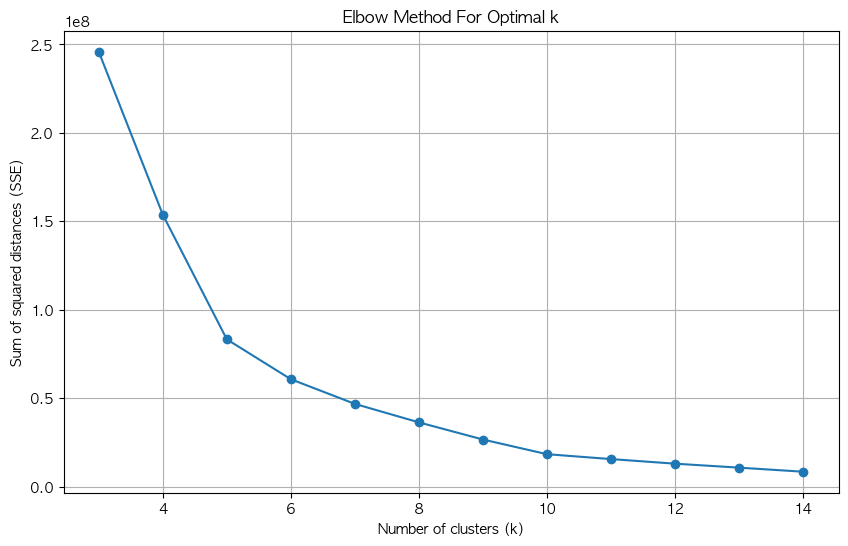

In [27]:
# k-mean로 관중 수 범위 나눌 k 값 찾기

# 데이터 전처리: 타깃 컬럼과 피쳐 컬럼 분리
features = kiwoom_2022_2023[['요일','순위']]
target = kiwoom_2022_2023[['관중 수']]

attendance_shape = np.array(target).reshape(-1,1)

# 특성 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(attendance_shape)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(3, 15)  # 3부터 15까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(attendance_shape)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [28]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(5):
    cluster_data = \
        kiwoom_2022_2023[clusters == cluster]
    min_attendance = \
        cluster_data['관중 수'].min()
    max_attendance = \
        cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)
cluster_ranges

{0: (6064, 8817),
 1: (3564, 5952),
 2: (9442, 12545),
 3: (774, 3238),
 4: (13301, 16000)}

In [29]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2022_2023['관중수 분류'] = \
    pd.cut(kiwoom_2022_2023['관중 수'], 
    bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
    labels=[
        np.mean(cluster_ranges[1]).round(0),
        np.mean(cluster_ranges[4]).round(0),
        np.mean(cluster_ranges[2]).round(0),
        np.mean(cluster_ranges[0]).round(0),
        np.mean(cluster_ranges[3]).round(0)
        ], 
    right=False)

In [ ]:
# # 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
# kiwoom_2022_2023['관중수 분류'] = \
#     pd.cut(kiwoom_2022_2023['관중 수'], 
#     bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
#     labels=[
#         2,
#         5,
#         3,
#         1,
#         4
#         ], 
#     right=False)

In [30]:
kiwoom_2022_2023['관중수 분류'] = kiwoom_2022_2023['관중수 분류'].astype(int)
kiwoom_2022_2023

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간,관중수 분류
0,2022-04-02,5273,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,9149,롯데,8257,14:00,17:12,3:12,10994
1,2022-04-03,5665,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,7838,롯데,6115,14:00,17:55,3:55,10994
2,2022-04-05,5273,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,5631,LG,2298,18:30,21:34,3:04,4758
3,2022-04-06,4787,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,5168,LG,2304,18:30,22:13,3:43,4758
4,2022-04-07,4787,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,4777,LG,2055,18:30,21:01,2:31,4758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-21,9320,134,53,78,3,0.405,27.0,2승0무8패,2승,30-2-35,23-1-43,4777,NC,5178,18:30,21:18,2:48,14650
139,2023-09-28,9320,136,55,78,3,0.414,27.0,4승0무6패,4승,31-2-35,24-1-43,4777,SSG,7082,17:00,19:59,2:59,10994
140,2023-09-29,9320,137,55,79,3,0.410,27.0,4승0무6패,1패,31-2-36,24-1-43,6411,KIA,14472,14:00,17:57,3:57,2006
141,2023-10-07,9320,141,57,81,3,0.413,27.5,6승0무4패,2승,32-2-36,25-1-45,9149,LG,13301,17:00,19:49,2:49,2006


In [31]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2024['관중수 분류'] = \
    pd.cut(kiwoom_2024['관중 수'], 
    bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
    labels=[
        np.mean(cluster_ranges[1]).round(0),
        np.mean(cluster_ranges[4]).round(0),
        np.mean(cluster_ranges[2]).round(0),
        np.mean(cluster_ranges[0]).round(0),
        np.mean(cluster_ranges[3]).round(0)
        ], 
    right=False)

In [ ]:
# # 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
# kiwoom_2024['관중수 분류'] = \
#     pd.cut(kiwoom_2024['관중 수'], 
#     bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
#     labels=[
#         2,
#         5,
#         3,
#         1,
#         4
#         ], 
#     right=False)

In [32]:
kiwoom_2024['관중수 분류'] = kiwoom_2024['관중수 분류'].astype(int)
kiwoom_2024

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간,관중수 분류
0,2024-03-29,9320,4,0,4,0,0.000,4.0,0승0무4패,4패,0-0-1,0-0-3,6411,LG,8465,18:30,21:13,2:43,10994
1,2024-03-30,9557,5,1,4,0,0.200,4.0,1승0무4패,1승,1-0-1,0-0-3,9149,LG,13462,17:01,19:45,2:44,2006
2,2024-03-31,4787,6,2,4,0,0.333,4.0,2승0무4패,2승,2-0-1,0-0-3,7838,LG,11822,14:00,16:49,2:49,7440
3,2024-04-05,5876,9,5,4,0,0.556,2.5,5승0무4패,5승,3-0-1,2-0-3,6411,한화,16000,18:30,21:31,3:01,2006
4,2024-04-06,5876,10,6,4,0,0.600,1.5,6승0무4패,6승,4-0-1,2-0-3,9149,한화,16000,17:01,19:56,2:55,2006
5,2024-04-07,5357,11,7,4,0,0.636,1.0,7승0무3패,7승,5-0-1,2-0-3,7838,한화,16000,14:00,17:25,3:25,2006
6,2024-04-12,5357,15,9,6,0,0.600,2.5,8승0무2패,2승,6-0-1,3-0-5,6411,롯데,8838,18:30,21:31,3:01,10994
7,2024-04-13,5357,16,10,6,0,0.625,2.5,8승0무2패,3승,7-0-1,3-0-5,9149,롯데,14197,17:00,19:52,2:52,2006
8,2024-04-14,5357,17,11,6,0,0.647,2.5,8승0무2패,4승,8-0-1,3-0-5,7838,롯데,12333,14:00,17:45,3:45,7440
9,2024-04-16,4966,18,12,6,0,0.667,1.5,8승0무2패,5승,9-0-1,3-0-5,5631,KT,2877,18:31,21:04,2:33,4758


In [42]:
kiwoom_2022_2023[['순위','요일','관중수 분류','관중 수']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   순위      143 non-null    int64
 1   요일      143 non-null    int64
 2   관중수 분류  143 non-null    int64
 3   관중 수    143 non-null    int64
dtypes: int64(4)
memory usage: 5.6 KB


In [33]:
kiwoom_2022_2023[['관중 수','관중수 분류','순위','요일']].corr()

,관중 수,관중수 분류,순위,요일
관중 수,1.000000,-0.282840,0.517004,0.450994
관중수 분류,-0.282840,1.000000,-0.097286,-0.052419
순위,0.517004,-0.097286,1.000000,0.106180
요일,0.450994,-0.052419,0.106180,1.000000


In [ ]:
kiwoom_2022_2023.info()

In [ ]:
kiwoom_2024[['순위','요일','관중수 분류']]

In [ ]:
kiwoom_2024.info()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [46]:
# 데이터 준비 (x는 피쳐, y는 타겟)
x = kiwoom_2022_2023[['요일','순위']]
y = kiwoom_2022_2023['관중 수']

# 실제 데이터 준비
test_x = kiwoom_2024[['요일','순위']]
test_y = kiwoom_2024['관중 수']

In [54]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(
            classifier, # 함수
            features,
            labels,
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        cv_scores.append(round(scores.mean()*100,0))
    return cv_scores

In [55]:
# 랜덤포레스트
cross_validation(RandomForestClassifier(), x, y)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [50]:
# 데이터 학습 시키고 예측하기
clf = RandomForestRegressor
clf.fit(x, y)
pre = clf.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)
from sklearn import metrics
ac_score = metrics.accuracy_score(test_y, pre)
cl_report = metrics.classification_report(test_y, pre)

print('정답률 =', ac_score)
print('리포트 =', cl_report)

TypeError: BaseForest.fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# 랜덤포레스트
cross_validation(SVC(), x, y)

In [ ]:
# SVC 모델 생성
model = RandomForestClassifier()

# 10-겹 교차 검증으로 정확도 평가
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')

# 평균 정확도 출력
print("평균 정확도:", round(scores.mean()*100),'%')
# 각 교차 검증 점수 출력
print("각 교차 검증 점수:", scores.round(2)*100)

In [ ]:
# 의사결정 나무
cross_validation(tree.DecisionTreeClassifier(), x, y)

In [56]:
# 손글씨
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [57]:
# 의사결정 나무
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x, y)
print(f"dTree : {dtree.score(X_test, Y_test)*100}")

# KNN
knn = KNeighborsClassifier().fit(X_train, Y_train)
print(f"kNN : {knn.score(X_test, Y_test)*100}")

# SVM
svm = SVC(probability=True).fit(X_train, Y_train)
print(f"svm : {svm.score(X_test, Y_test)*100}")

dTree : 48.275862068965516
kNN : 0.0
svm : 3.4482758620689653


In [58]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree),
        ('knn', knn),
        ('svm', svm),
    ],
    weights=[1,1,1],
    voting='hard'
).fit(X_train, Y_train)

voting_clf.score(X_test, Y_test)*100

0.0

In [59]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree),
        ('knn', knn),
        ('svm', svm),
    ],
    weights=[1,1,1],
    voting='soft'
).fit(X_train, Y_train)

voting_clf.score(X_test, Y_test)*100

0.0